# **EE 679 Speech Processing**
## **Computing Assignment 3: Automatic Word Recognition**

### *Submitted by*

 *Abhishek Anand*
 
 *18D070001*

installing the module hmmlearn

In [ ]:
!pip install hmmlearn  # installing the module hmmlear

     |████████████████████████████████| 374 kB 5.2 MB/s 


## **Import**

In [ ]:
# importing required libraries

import numpy as np
import os
import math
import scipy.signal
import librosa
import soundfile as sf
import IPython.display 
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import hmmlearn
import itertools

from hmmlearn import hmm
import scipy
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import math
import scipy.misc
from scipy.io.wavfile import read
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.io import wavfile
from sklearn.metrics import ConfusionMatrixDisplay
import soundfile as sf
import random

pi = math.pi
exp = math.exp

In [ ]:
from google.colab import drive    # mounting drive to load training and test data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/sem 7/ee 679

/content/drive/My Drive/sem 7/ee 679


In [ ]:
# %cd /content/drive/My\ Drive/sem 7/ee 679/Commands_Dataset/train

/content/drive/My Drive/sem 7/ee 679/Commands Dataset/train


# **Pre-Processing**

function to do end-pointing

In [ ]:
%cd /content/drive/My\ Drive/sem 7/ee 679/Commands_Dataset/train/down 

/content/drive/My Drive/sem 7/ee 679/Commands Dataset/train/down


In [ ]:
list(os.listdir())[0]

'de4f7798_nohash_1.wav'

# **Checking a sample data**

In [ ]:
(sig, rate) = librosa.load('de4f7798_nohash_1.wav', sr=None)
IPython.display.Audio('de4f7798_nohash_1.wav') # load a local WAV file

In [ ]:
len(sig)

16000

Text(0, 0.5, 'magnitude')

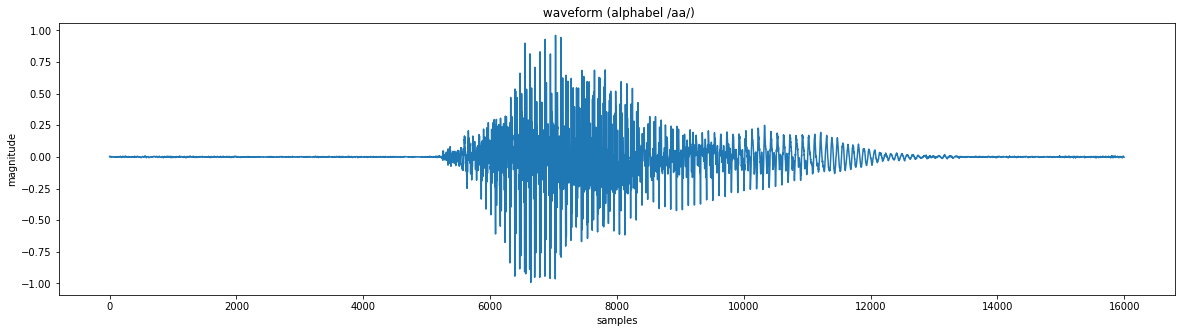

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(sig)
plt.title(" waveform")
plt.xlabel("samples")
plt.ylabel("magnitude")

# **Function to do end-pointing**

In [ ]:
# function to caiculate enery of a signal

def energy_hamming(signal):
    h = np.hamming(160)
    energy = np.matmul(signal*h,signal*h)
    return energy


# function to do end-pointing

def end_point(signal):
    n = len(signal)
    slices = []
    for i in range(1,n//160):
        slices.append(signal[(i-1)*160 : i * 160 ])
    
    num = len(slices)
    #print(len(slices))

    start = 0
    end = num-1

    # calculating start

    for i in range(num):
        if energy_hamming(slices[i]) > 0.004 :
            start = i
            break 
    # calculating end
    for i in range(num-1,0,-1):
        if energy_hamming(slices[i]) > 0.004 :
            end = i+1
            break

    a = np.array(slices[start:end])
    a = a.flatten()

    return a

99
33
83


Text(0, 0.5, 'magnitude')

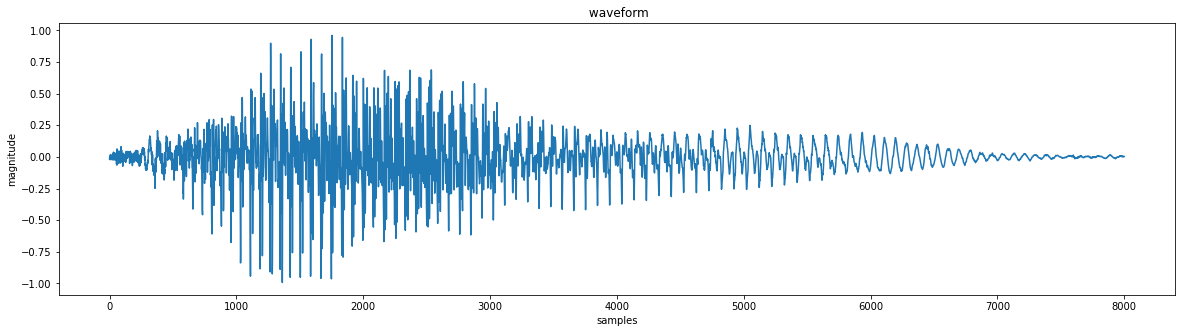

In [ ]:
# end-pointing a signal

a = end_point(sig)
b = np.array(a)
b = b.flatten()
plt.figure(figsize = (20,5))
plt.plot(b)
plt.title(" waveform")
plt.xlabel("samples")
plt.ylabel("magnitude")

down
14880
11680
21920
20640
10560
21920
21920
19840
21920
21600
12640
16480
21920
21920
14400
14560
15360
16800
16320
14560
8480


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


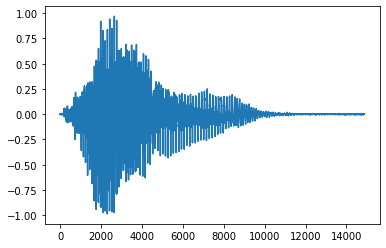

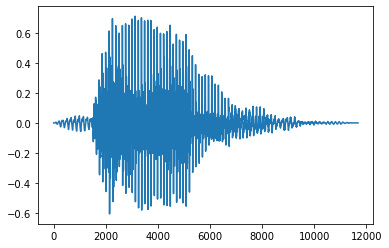

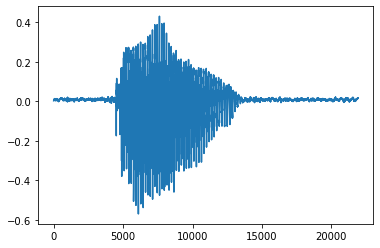

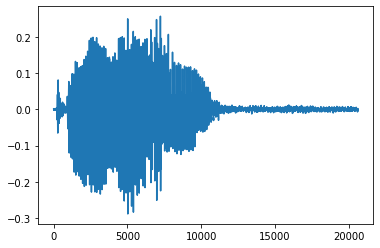

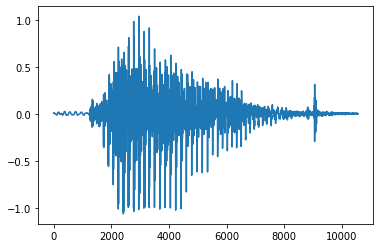

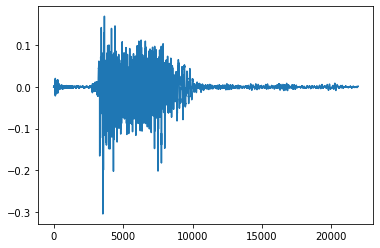

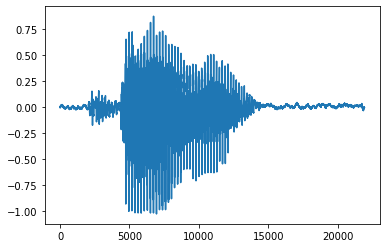

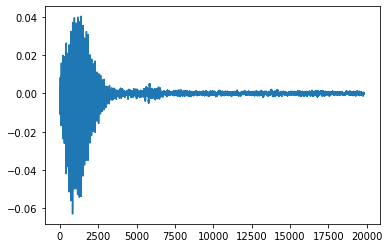

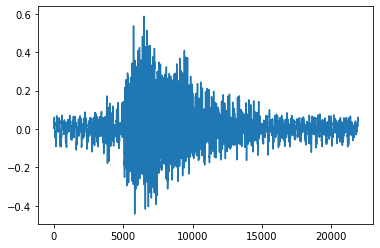

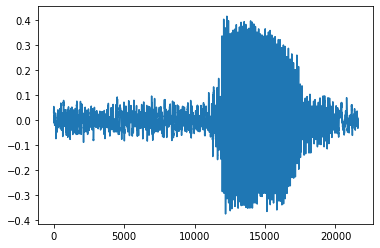

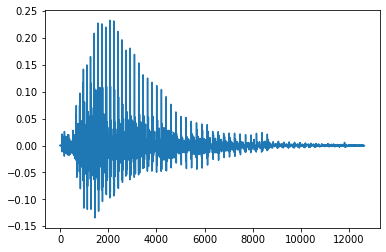

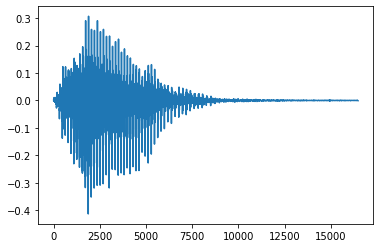

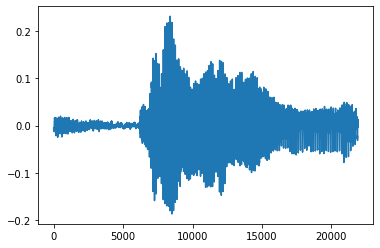

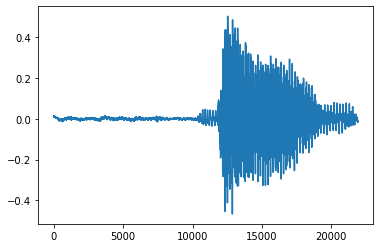

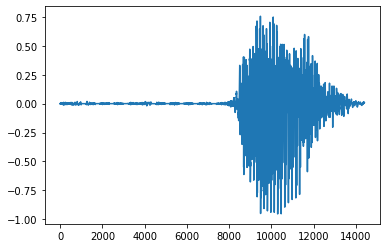

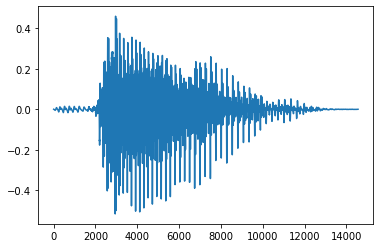

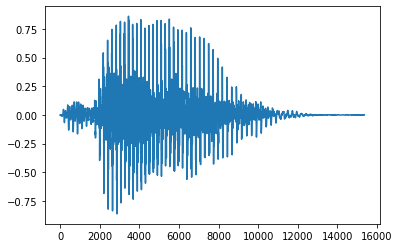

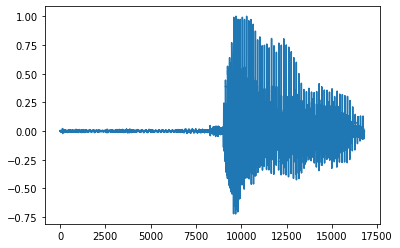

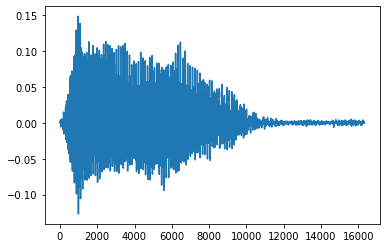

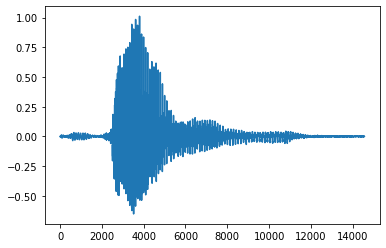

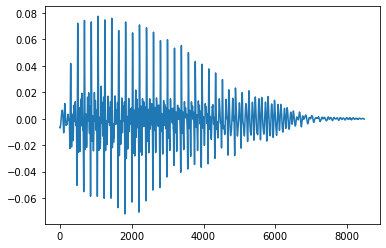

In [ ]:
# doing end-pointing on few signals

i = 0
for word in os.listdir('Commands_Dataset/train'): 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        #sig,sr = librosa.load(filepath)

        #endp = end_point(sig)

        endp = end_pointing(filepath)

        print(len(endp))
        plt.figure()
        plt.plot(endp)

        i = i + 1

        if i > 20 :
            break
    if i > 20 :
        break

        # ### to ignoise only empyty / noise files
        # if np.int(len(endp)) >10000 :
        #     sf.write('Commands_Dataset/train_end_pointed/'+ word + '/' + sample, end
                     

# **Function to do pre-emphasis**

In [ ]:
def pre_emp(filepath, pre_emphasis_factor = 0.95):
    sig,sr= librosa.load(filepath)
    n = len(sig)

    output = [0]*n

    output[0] = sig[0]

    for i in range(1,n):

        output[i] = sig[i] - pre_emphasis_factor * sig[i-1]
        
    return output

### **Function to extract MFCC features**

In [ ]:
# MFCC feature extraction

def mfcc(filepath):

    sig ,samp = librosa.load(filepath)
    #mfcc

    mfcc = librosa.feature.mfcc(y=sig, sr=samp, n_mfcc=13 ,S=None, dct_type=2, norm='ortho')
    ## difference of mfcc
    mfcc_delta = librosa.feature.delta(mfcc,order=1, mode = 'nearest')
    ## difference of difference
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2, mode = 'nearest')

    mfcc_features = np.concatenate((mfcc, mfcc_delta , mfcc_delta2 ), axis=0)
    
    return mfcc_features 

# **Doing end-ponting to all train files**

In [ ]:
%cd /content/drive/My\ Drive/sem 7/ee 679

In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

for word in os.listdir('Commands_Dataset/train'): 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_point(sig)

        print(len(endp))
        ### to ignoise only empyty / noise files
        #if np.int(len(endp)) >10000 :
        sf.write(str('Commands_Dataset/train_end_pointed/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


total count 23194

time taken = 160 minutes

saving pre-emphasized files

## **Doing pre-emphasizing to all train files**

Doing pre-emphasis on few samples

go
19184
11687
26240
8820
10805
15876
12569
7497
9482
29988
16097
29988
10364
28224
9041
7056
11687
9702
6174
29988
18743


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


27563
7277
29988
29988
29988
11907
10805
12128
28004
29106
14774
24696
13451
24476
14112
21609
15656
22271
29988
11246
14994
15435
23373
13010
23153
14553
16979
11246
29327
17199


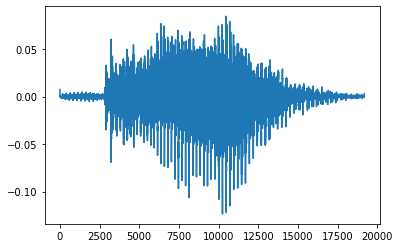

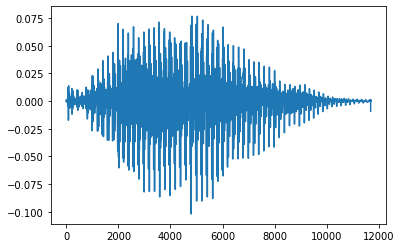

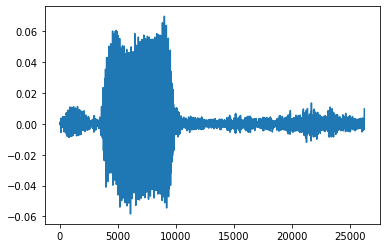

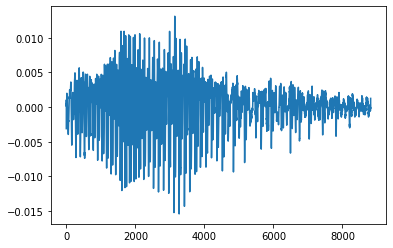

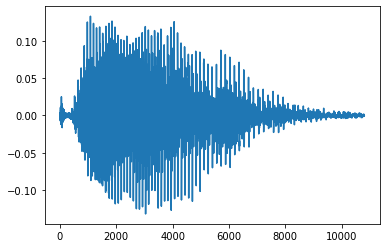

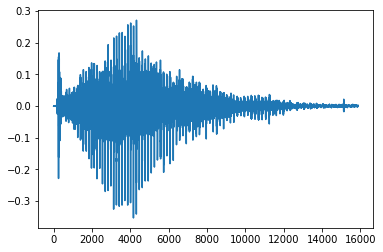

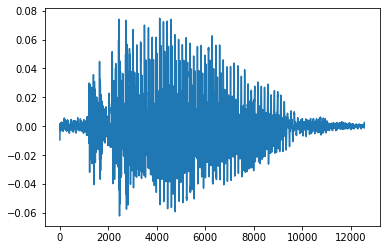

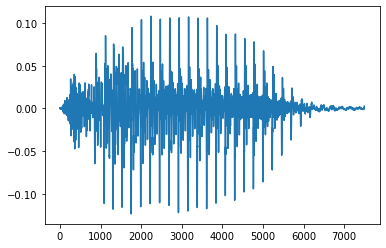

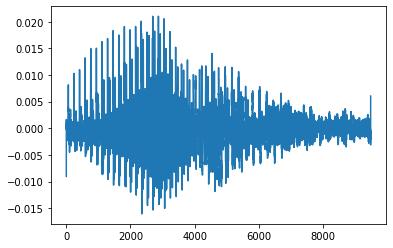

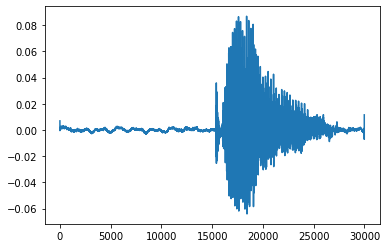

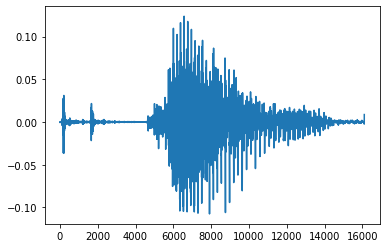

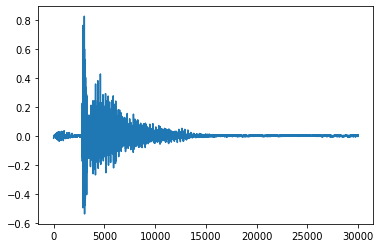

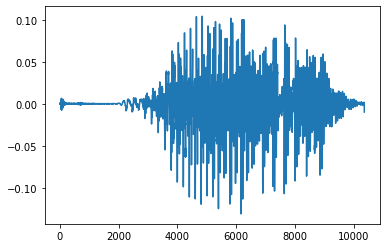

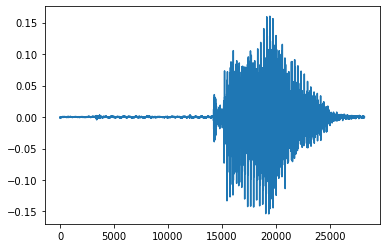

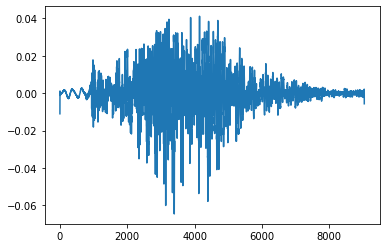

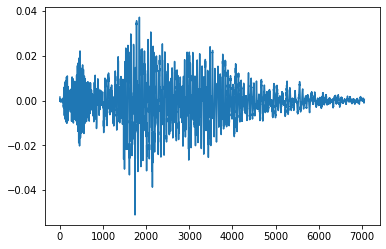

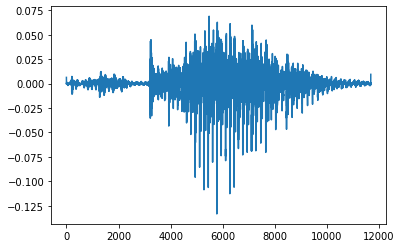

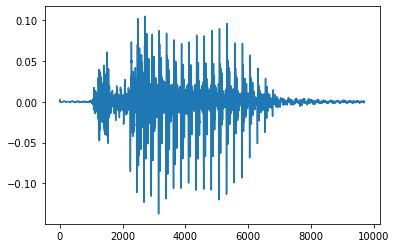

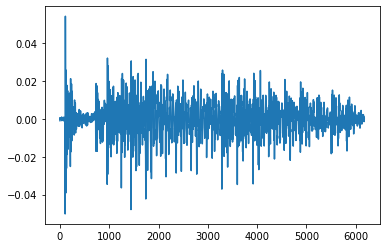

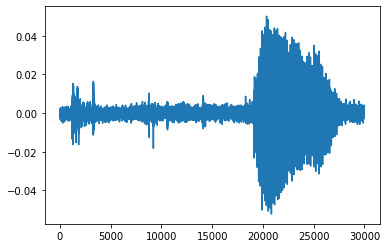

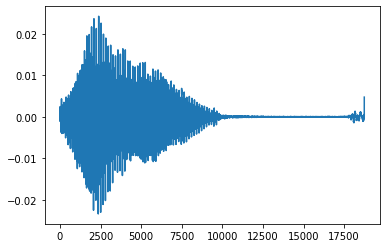

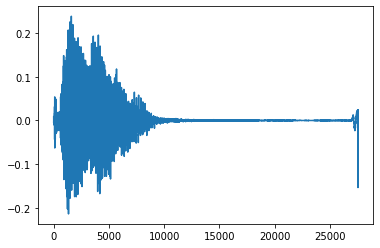

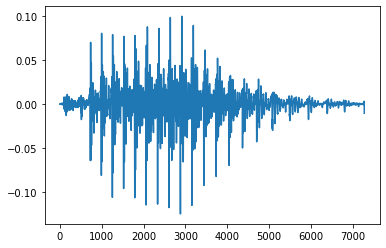

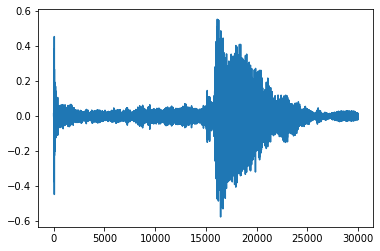

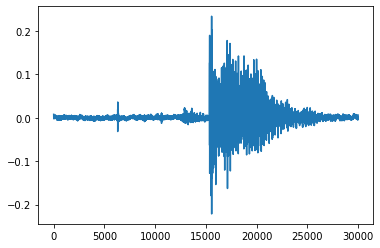

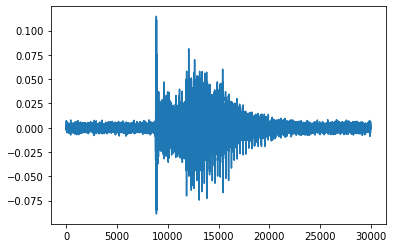

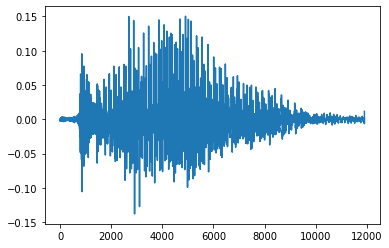

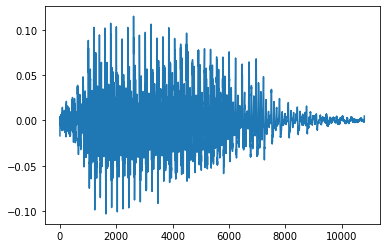

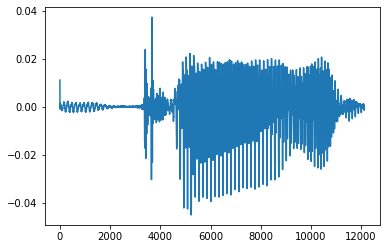

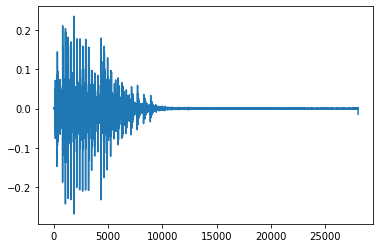

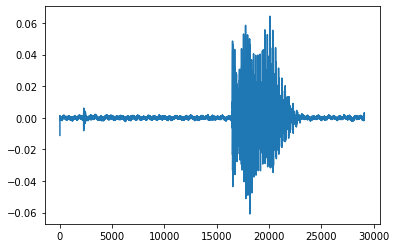

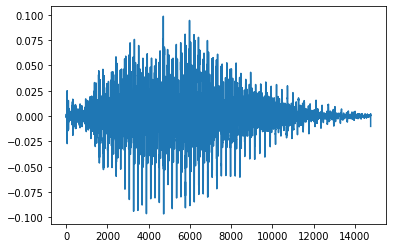

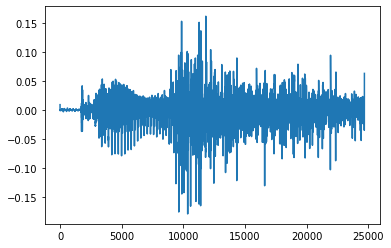

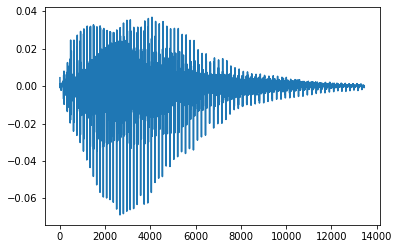

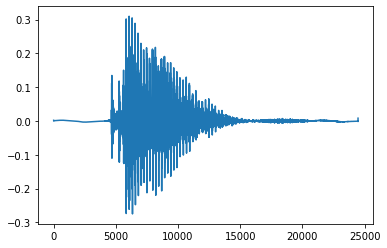

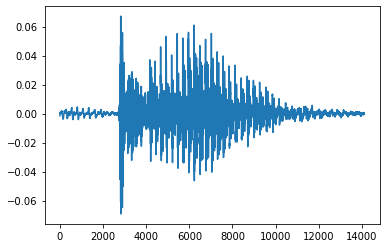

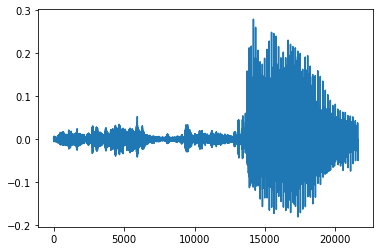

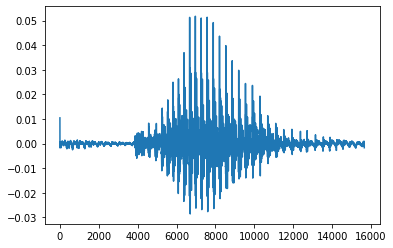

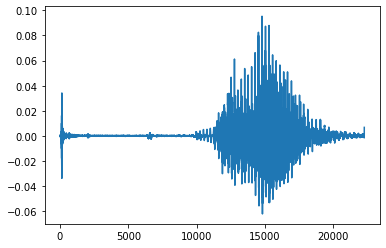

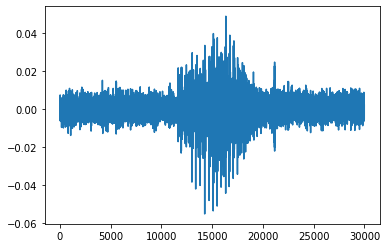

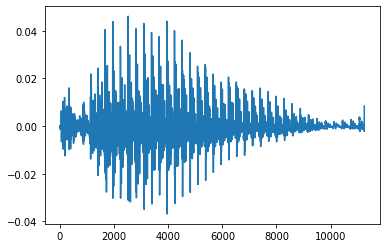

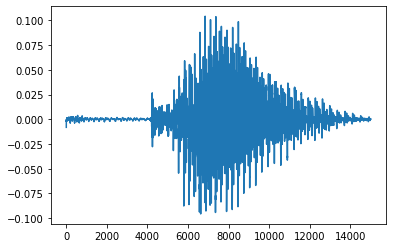

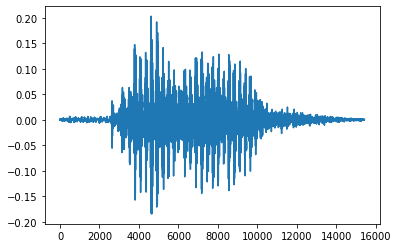

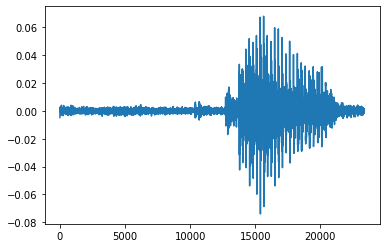

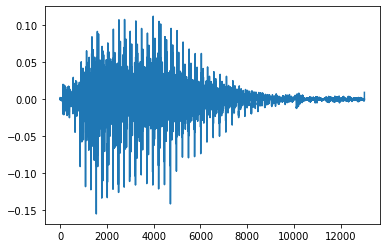

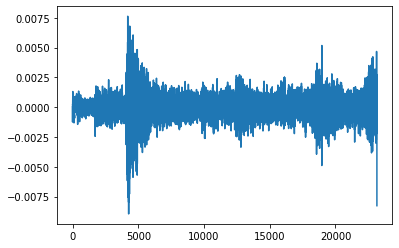

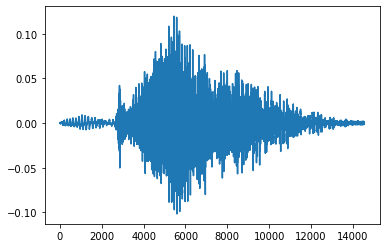

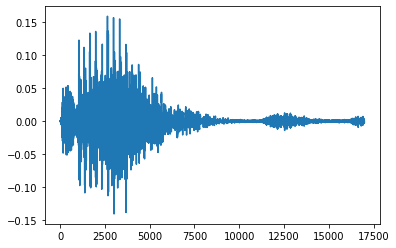

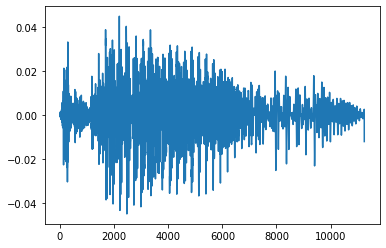

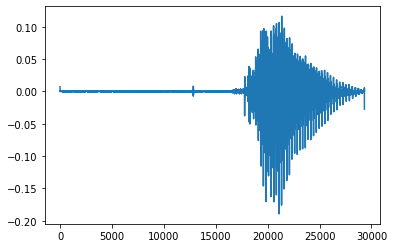

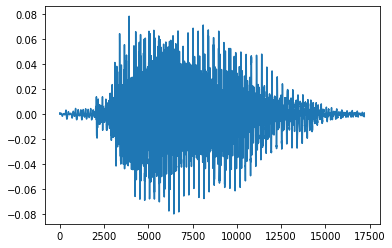

In [ ]:
i = 0
for word in os.listdir('Commands_Dataset/train_end_pointed'): 
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train_end_pointed/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        #endp = end_point(sig)

        endp = pre_emp(filepath)

        print(len(endp))
        plt.figure()
        plt.plot(endp)

        i = i + 1

        if i > 50 :
            break
    if i > 50 :
        break

        # ### to ignoise only empyty / noise files
        # if np.int(len(endp)) >10000 :
        #     sf.write('Commands_Dataset/train_end_pointed/'+ word + '/' + sample, end
                     

Text(0, 0.5, 'magnitude of Fourier Transform')

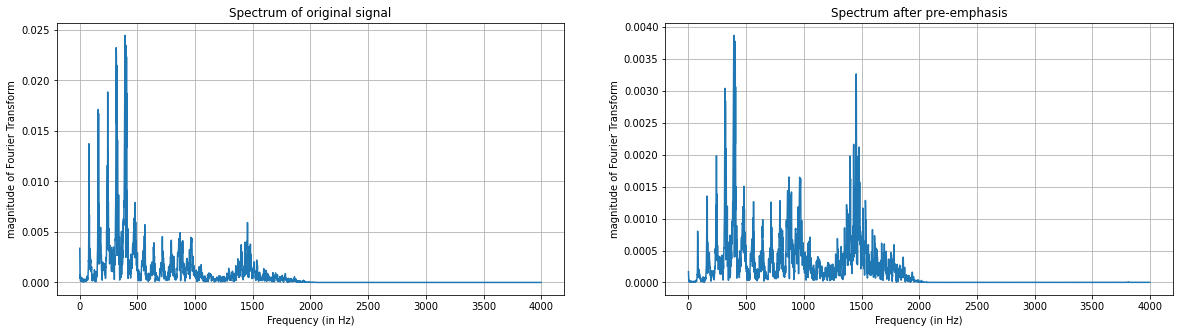

In [ ]:
# computing Fourier transform

from scipy.fft import fft, fftfreq
# Number of sample points
N = len(sig)
# sample spacing
T = 1.0 / 16000.0
yf = fft(sig)
xf = fftfreq(N, T)[:N//4]

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(  xf  , 2.0/N * np.abs(yf[0:N//4])  )
plt.grid()
plt.title("Spectrum of original signal")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("magnitude of Fourier Transform")

signal = endp
yf = fft(signal)
xf = fftfreq(N, T)[:N//4]

plt.subplot(122)
plt.plot(  xf  , 2.0/N * np.abs(yf[0:N//4])  )
plt.grid()
plt.title("Spectrum after pre-emphasis")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("magnitude of Fourier Transform")

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

['go', 'left', 'up', 'off', 'on', 'right', 'stop', 'yes', 'no', 'down']

'go' , 'left', 'up', 'off', 'on' ,  'right', 'stop' 'yes', 'no'    done

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['down' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['yes', 'no' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['right', 'stop' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['off', 'on']:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['left', 'up']:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
 os.listdir('Commands_Dataset/train_end_pointed')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['go']:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_end_pointed/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

storing the training data

## **Training Data creation**

In [ ]:
i = 0

training = {}

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training[c] = []

for word in os.listdir('Commands_Dataset/train_pre_emp'):
    print(word)
    for sample in os.listdir('Commands_Dataset/train_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training[true_word]
        y.append(sample_mfcc)
        training[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

# with open("training_pre_emp_clean.pkl", "wb") as file:
#     pickle.dump(training , file)

In [ ]:
# saving the training data

with open("training_pre_emp_clean.pkl", "wb") as file:
    pickle.dump(training , file)

In [ ]:
infile = open('training_pre_emp_clean.pkl','rb')
training = pickle.load(infile)
infile.close()

## **Test Data creation**

In [ ]:
def energy_hamming(signal):
    h = np.hamming(160)
    energy = np.matmul(signal*h,signal*h)
    return energy


def end_point_file(filename):

    #signal , sr = librosa.load(filename)

    signal, sr = sf.read(filename)

    n = len(signal)
    slices = []
    for i in range(1,n//160):
        slices.append(signal[(i-1)*160 : i * 160 ])
    
    num = len(slices)
    #print(len(slices))

    start = 0
    end = num-1

    for i in range(num):
        if energy_hamming(slices[i]) > 0.004 :
            start = i
            break 
    
    for i in range(num-1,0,-1):
        if energy_hamming(slices[i]) > 0.004 :
            end = i+1
            break

    a = np.array(slices[start:end])
    a = a.flatten()

    return a

def pre_emp_signal(sig, pre_emphasis_factor = 0.95):

    n = len(sig)

    output = [0]*n

    output[0] = sig[0]

    for i in range(1,n):

        output[i] = sig[i] - pre_emphasis_factor * sig[i-1]
        
    return output

# MFCC feature extraction

def mfcc_signal(sig):

    #mfcc

    mfcc = librosa.feature.mfcc(y=sig, sr=16000, n_mfcc=13 ,S=None, dct_type=2, norm='ortho')
    ## difference of mfcc
    mfcc_delta = librosa.feature.delta(mfcc,order=1, mode = 'nearest')
    ## difference of difference
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2, mode = 'nearest')

    mfcc_features = np.concatenate((mfcc, mfcc_delta , mfcc_delta2 ), axis=0)
    
    return mfcc_features 

In [ ]:
# !pip install audioread

In [ ]:
# import audioread

In [ ]:
# import soundfile as sf

# data, samplerate = sf.read('Commands_Dataset/test_clean/off/b11a05d2_nohash_0.wav')
# data

array([-0.00180054, -0.00198364, -0.00357056, ..., -0.00183105,
       -0.0022583 , -0.00183105])

In [ ]:

i = 0
testing_clean = {}

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    testing_clean[c] = []

for word in os.listdir('Commands_Dataset/test_clean'):
    for sample in os.listdir('Commands_Dataset/test_clean/'+word):
        true_word = word
        p = 'Commands_Dataset/test_clean/'+word + '/' + sample

        enp  = end_point_file(p)

        pre_empha = pre_emp_signal(enp)  
        pre_empha = np.array(pre_empha)

        print(p)

        sample_mfcc = mfcc_signal(pre_empha).T
        y = testing_clean[true_word]
        y.append(sample_mfcc)
        testing_clean[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break


print('testing data created')

#Saving the testing data

with open("testing_clean.pkl", "wb") as file:
    pickle.dump(testing_clean , file)


In [ ]:
infile = open('testing_clean.pkl','rb')
testing = pickle.load(infile)
infile.close()

# **Training**

took 17 minute

In [ ]:

training_data_file  =  open('training_pre_emp_clean.pkl', 'rb')
training = pickle.load(training_data_file)
training_data_file.close()


trained_model = {}
hmm_states = 6

for true_word in training.keys():
    #model = hmm.GMMHMM(n_components=hmm_states, covariance_type='diag', n_iter= 15 , verbose=False ,  )

    model = hmm.GaussianHMM(n_components = hmm_states, covariance_type='full', n_iter= 1)
    print(true_word)

    ## collecting the features of each word to train 
    data = training[true_word]

    n = len(data)

    u = np.zeros([n,] , dtype=np.int)
    
    # for j in range(n):
    #     u[j] =  data[j].shape[0]

    q = 0
    while q < np.int(len(data)):
        u[q] = data[q].shape[0]
        q =q+1
    
    data = np.vstack(data)

    # n = len(data)
    # n1 = len(data)
    # data = np.array(data)
    # data = data.reshape(n,n1)

    model.fit(data, lengths=u)
    
    trained_model[true_word] = model


# saving model as pkl file

with open("trained_clean_gmmhmm_iter_1.pkl", "wb") as file:
    pickle.dump(trained_model, file)

down
go
left
no
off
on
right
stop
up
yes


In [ ]:
model.monitor_

ConvergenceMonitor(
    history=[-11927419.277551293],
    iter=1,
    n_iter=1,
    tol=0.01,
    verbose=False,
)

In [ ]:
with open("trained_clean.pkl", "wb") as file:
    pickle.dump(trained_model, file)

## **saving model**

In [ ]:
# saving trained model

with open("trained_clean.pkl", "wb") as file:
    pickle.dump(trained_model, file)

## **Prediction**

In [ ]:

# making the input featurs and output labels of test data  

test_data  =  open('testing_clean.pkl', 'rb')
test = pickle.load(test_data)
test_data.close()


x_testA = []
y_testA = []

for a in test.keys():
    feature = test[a]

    l = len(feature)

    for t  in range(l):
        y_testA.append(a)
        x_testA.append(feature[t])


# function to do prediction

def prediction(test_data, trained):
    predicted_label = []
    words = []
    score_values = []

    for k in trained.keys():
        score_values.append(trained[k].score(test_data))
        words.append(k)

    predicted_label.append(score_values.index(max(score_values)))

    return words[predicted_label[0]]



In [ ]:
# predicting the output for testing data

#trained_model  =  open('trained_clean.pkl', 'rb')
trained_model  =  open('trained_clean_gmmhmm_iter_1.pkl', 'rb')
trained_model_hmm = pickle.load(trained_model)
trained_model.close()

n = len(x_testA)
pred_test = []
pred_train = []
tot_test = 0

for i in range(n):
  y_pred = prediction(x_testA[i],trained_model_hmm )

  if y_pred == y_testA[i]:
      tot_test += 1

  pred_test.append(y_pred)

above training part took 1 minutes for 10 iteration

## **Confusion Matrix Plot**

<class 'numpy.ndarray'>
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']
[ 0 66 14  0 93  4 96  2 45  6]
Accuracy =  12.699649396182314 %


<Figure size 1080x1080 with 0 Axes>

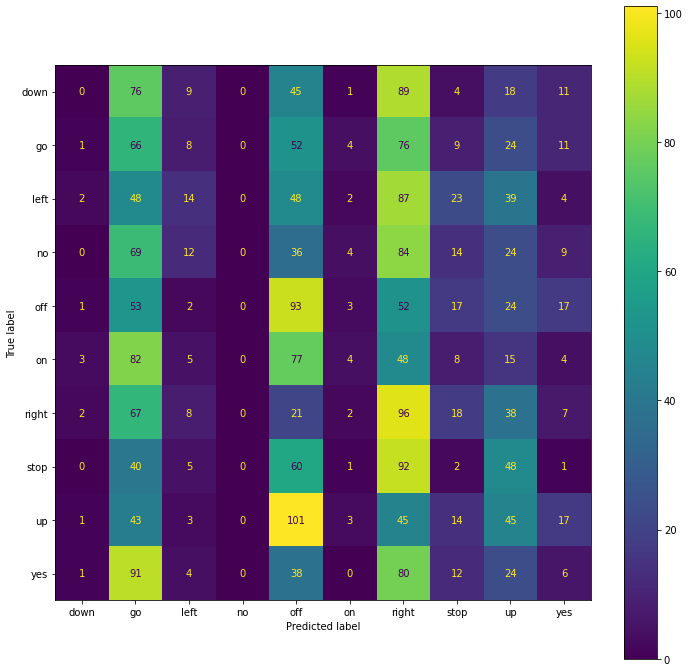

In [ ]:

cm = confusion_matrix(y_testA, pred_test)

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(12,12))
#cmp.plot(ax=ax)

disp.plot(ax=ax)
plt.show()

# classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']



|iteration : |  Accuracy | Remarks |
|----     | --- | --- |
| 10  |  14 |   |
| 25  |  13 | |
| 5  | 12 | gmmhmm , covar = 'diag'|
| 5  | 14 | gmmhmm , covar = 'full'|
|5  |14  |gausianhmm , on training 75 % |
1  |   12 | gaussian hmm , on training 77 % |

# **Prediction on training data**

In [ ]:

# making the input featurs and output labels of test data  

test_data  =  open('training_pre_emp_clean.pkl', 'rb')
test = pickle.load(test_data)
test_data.close()


x_testA = []
y_testA = []

for a in test.keys():
    feature = test[a]

    l = len(feature)

    for t  in range(l):
        y_testA.append(a)
        x_testA.append(feature[t])


# function to do prediction

def prediction(test_data, trained):
    predicted_label = []
    words = []
    score_values = []

    for k in trained.keys():
        score_values.append(trained[k].score(test_data))
        words.append(k)

    predicted_label.append(score_values.index(max(score_values)))

    return words[predicted_label[0]]



In [ ]:
# predicting the output for testing data

#trained_model  =  open('trained_clean.pkl', 'rb')
trained_model  =  open('trained_clean_gmmhmm_iter_1.pkl', 'rb')
trained_model_hmm = pickle.load(trained_model)
trained_model.close()

n = len(x_testA)
pred_test = []
pred_train = []
tot_test = 0

for i in range(n):
  y_pred = prediction(x_testA[i],trained_model_hmm )

  if y_pred == y_testA[i]:
      tot_test += 1

  pred_test.append(y_pred)

above training part took 1 minutes for 10 iteration

## **Confusion Matrix Plot**

<class 'numpy.ndarray'>
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']
[1966 1534 1530 1994 1943 1809 2099 1817 1513 2113]
Accuracy =  77.35315231620287 %


<Figure size 1080x1080 with 0 Axes>

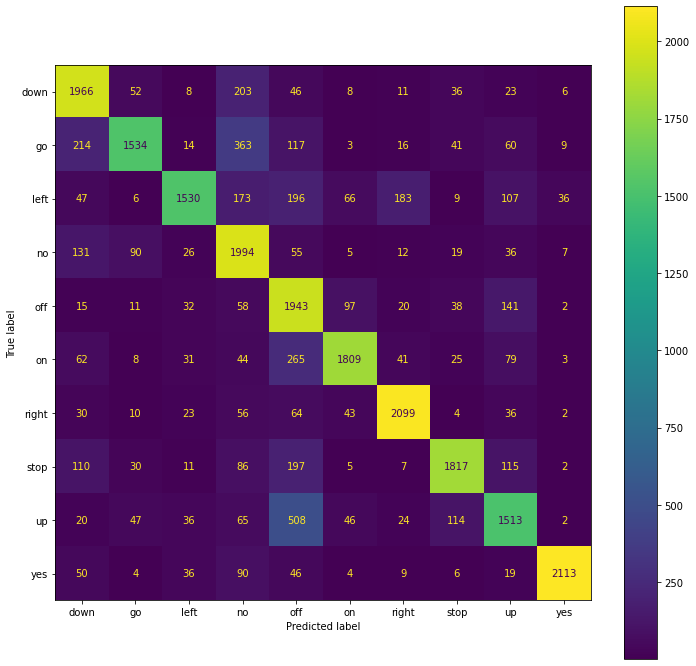

In [ ]:

cm = confusion_matrix(y_testA, pred_test)

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(12,12))
#cmp.plot(ax=ax)

disp.plot(ax=ax)
plt.show()

# classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']



# **How to improve accuracy**



*   most of the test data was predicted as 'left' , 'off' , 'stop' , 'on' , and 'up'.

*   we need to collect more training data for the other classes.

*  From the confusion matrix, We can notice the confusion between “GO” & “NO”. This might be because both these both are very similar-sounding small utterances with one vowel sound in common. Also in in both word utterances speakers usually emphasize( more duration) more on the vowel “o” at end. Hhence, there is a lot  more confusion between these two words.

# **Task B**

# **Function to do end-pointing**

In [ ]:
# function to caiculate enery of a signal

def energy_hamming(signal):
    h = np.hamming(160)
    energy = np.matmul(signal*h,signal*h)
    return energy


def end_pointing(a):
    #a,sr= librosa.load(filepath)

    #### Slicing / extracting frames
    ### 20ms window frame

    i = np.int(len(a) )
    sliced = []
    k = 0
    while k<= (i/160)-2:
        m = a[k*160 : (k+2)*160]
        sliced.append(m)
        k = k+1
    # print(len(sliced))

    ### finding the start and using the energy
    s =0 
    l = 0
    noise = 1 
    updated = 0
    e = np.int(len(sliced))-1

    while l<np.int(len(sliced)):
        #### hamming window
        h = np.hamming(320)
        en = np.matmul(sliced[l]*h,sliced[l]*h)
        #### start point selection
        if(en > 0.004):
            if(noise == 1):
                noise = 0
                if updated == 0:
                    updated = 1
                    s = l
        ##end point selection 
        if(en < 0.00001 and noise == 0):
            noise = 1
            e = l

        l = l+1

    # print("start" ,s , "end " ,e)    

    d = e-s
    if d < 50:
        e = np.int(len(sliced))-1

    end_pointed = np.array(a[s*160 : (e+2)*160])
    return end_pointed


Text(0, 0.5, 'magnitude')

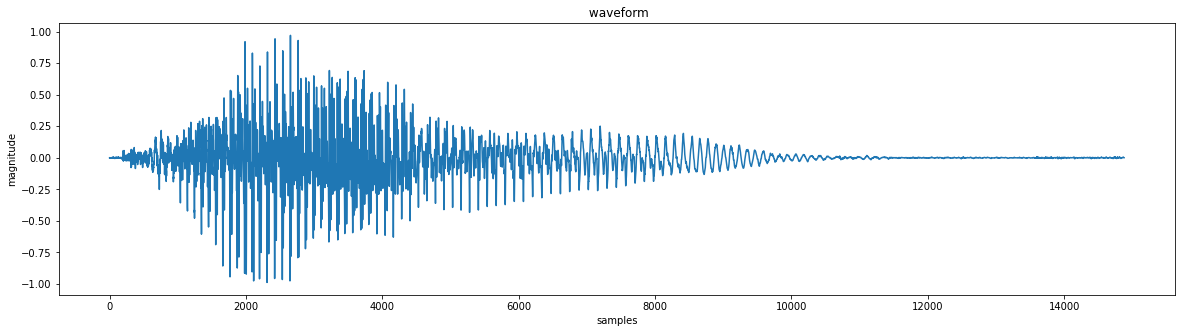

In [ ]:
# end-pointing a signal
(sig, rate) = librosa.load('./Commands_Dataset/train/down/de4f7798_nohash_1.wav')
#IPython.display.Audio('de4f7798_nohash_1.wav') # load a local WAV file


a = end_pointing(sig)
b = np.array(a)
b = b.flatten()
plt.figure(figsize = (20,5))
plt.plot(b)
plt.title(" waveform")
plt.xlabel("samples")
plt.ylabel("magnitude")

down
14880
11680
21920
20640
10560
21920
21920
19840
21920
21600
12640
16480
21920
21920
14400
14560
15360
16800
16320
14560
8480


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


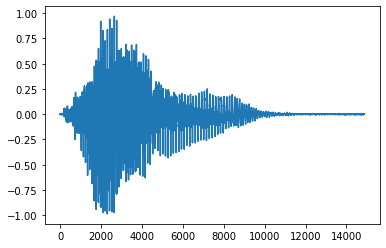

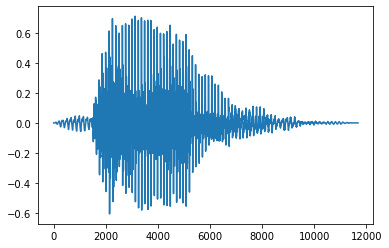

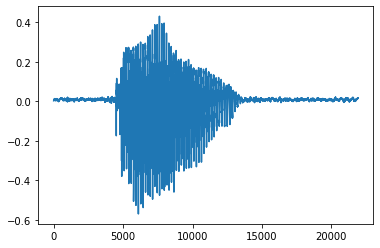

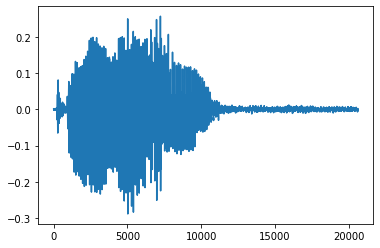

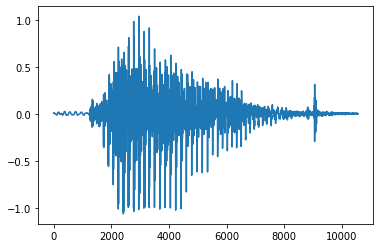

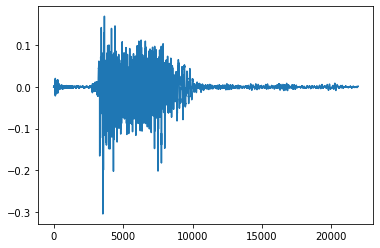

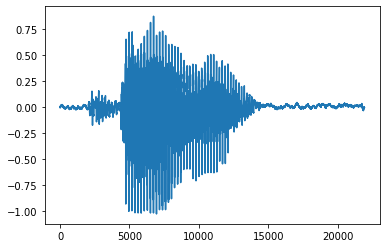

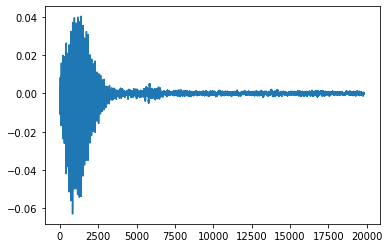

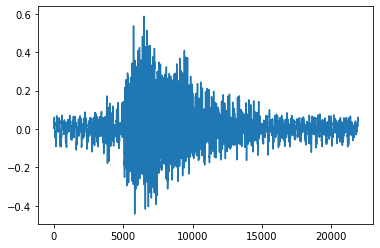

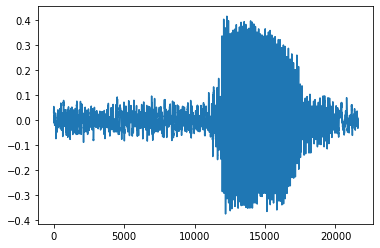

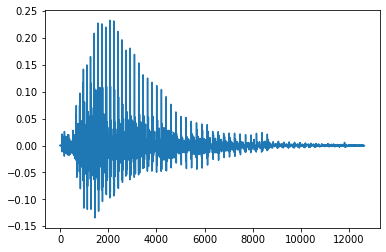

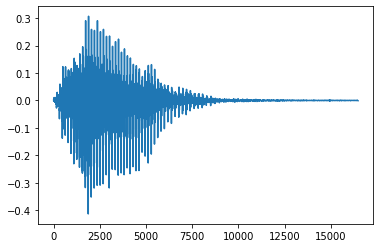

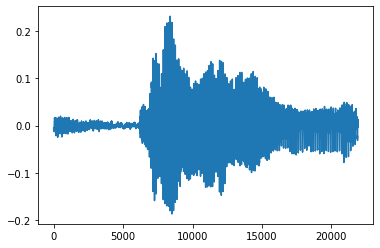

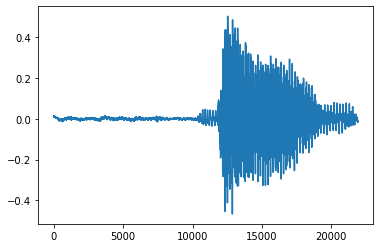

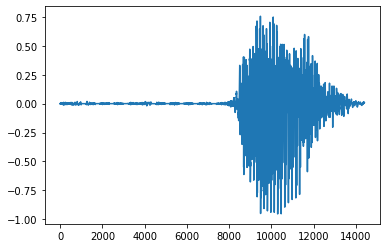

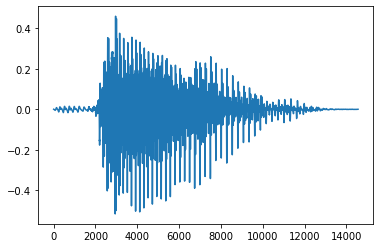

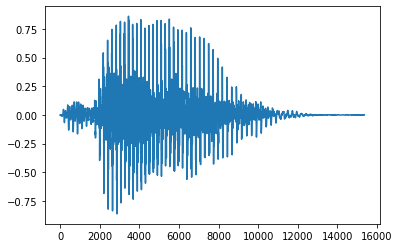

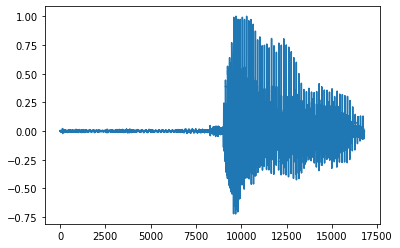

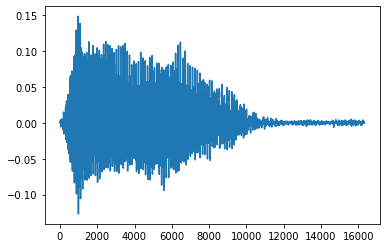

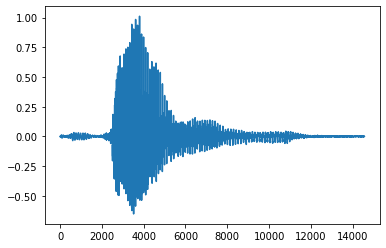

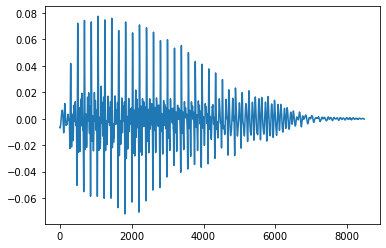

In [ ]:
# doing end-pointing on few signals

i = 0
for word in os.listdir('Commands_Dataset/train'): 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        #endp = end_pointing(filepath)

        print(len(endp))
        plt.figure()
        plt.plot(endp)

        i = i + 1

        if i > 20 :
            break
    if i > 20 :
        break

        # ### to ignoise only empyty / noise files
        # if np.int(len(endp)) >10000 :
        #     sf.write('Commands_Dataset/train_end_pointed/'+ word + '/' + sample, end
                     

# **Doing end-ponting to all train files**

 using the folder train_end_pointed_2

In [ ]:
%cd /content/drive/My\ Drive/sem 7/ee 679

down , go  , left, no , off ,   done

In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['down']: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['go']: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['left']: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['no']: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['no', 'off' ]: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['on' ]: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['right' ]: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['stop', 'up' ]: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


In [ ]:

os.listdir('Commands_Dataset/train')

i = 0

#for word in os.listdir('Commands_Dataset/train'): 
for word in ['yes' ]: 
    print(word)
    for sample in os.listdir('Commands_Dataset/train/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        endp = end_pointing(sig)

        print(len(endp))
        ## to ignoise only empyty / noise files
        if np.int(len(endp)) >10000 :
            sf.write(str('Commands_Dataset/train_end_pointed_2/'+ word + '/' + sample), endp,samplerate=16000 , )
        i = i + 1

        print(i)


# **Adding Noise to training data**

In [ ]:
#importing the required packages
import numpy as np
from scipy.io import wavfile


# Function to add 10dB SNR noise to a speech utterance. 
# Description = Clips a segment of noise from a random position from the noise file. 
# The noise segment is normalized and added to the speech. The noisy speech is saved to a separate file.
# Inputs:
# speechfile = Path to the speech utterance .wav file
# noisefile = Path to the noise .wav file
# outputfile = Path (along with a .wav file name) where the noisy speech file must be saved

def add_noise(speechfile, noisefile, outputfile):
    
    #reading the .wav files
    sampFreq, noise = wavfile.read(noisefile)
    sampFreq, speech = wavfile.read(speechfile)
    numSamples = len(speech)

    #clipping a segment of noise from a random position, with segment length equal to the length of speech 
    i = np.random.choice(np.arange(len(noise) - numSamples))
    noise = noise[i:i+numSamples]

    #converting the PCM values to floats with range from -1.0 to 1.0
    speech = speech/32768
    noise = noise/32768

    #normalizing the noise and adding it to the speech
    rawEnergy = np.sum(speech**2)
    noise = noise*(np.sqrt(rawEnergy/(10*np.sum(noise**2))))
    speech = speech + noise

    #normalizing the noisy speech so that its energy equals the energy of raw speech
    speech = speech*(np.sqrt(rawEnergy/np.sum(speech**2)))

    #converting the floats back to PCM values
    speech = speech*32767
    speech = speech.astype(np.int16)

    #saving the noisy speech to the output file
    wavfile.write(outputfile, sampFreq, speech)
    
    return



# if __name__ == "__main__":
    
#     #testing the function

#     speechfile = "./1b4c9b89_nohash_3.wav"
#     noisefile = "./running_tap.wav"
#     outputfile = "./noisy.wav"
#     add_noise(speechfile, noisefile, outputfile)



In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

for word in os.listdir('Commands_Dataset/train_end_pointed'): 
#for word in ['down' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

        if i > 30 :
            break
    if i > 30 :
            break

go
1
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.


3
4
5
6
7
8
9
10
11


# **Adding noise to all traning files**

down completed

In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['down' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['go' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['left', 'no' , 'off' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['on', 'right' , 'stop' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
import random

noise_files = os.listdir('Commands_Dataset/_background_noise_')
i = 0
os.listdir('Commands_Dataset/train_end_pointed')

# do for one class at a time

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['up', 'yes' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_end_pointed/'+ word): 
        #print(word, sample)

        r = random.randint(0,5)

        noise = noise_files[r]

        noise_file = 'Commands_Dataset/_background_noise_/'+ noise

        output_file = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        add_noise('Commands_Dataset/train_end_pointed/'+ word + '/' + sample , noise_file , output_file)

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

# **Function to do pre-emphasis**

In [ ]:
def pre_emp(filepath, pre_emphasis_factor = 0.95):
    sig,sr= librosa.load(filepath)
    n = len(sig)

    output = [0]*n

    output[0] = sig[0]

    for i in range(1,n):

        output[i] = sig[i] - pre_emphasis_factor * sig[i-1]
        
    return output

total count 23194

time taken = 160 minutes

saving pre-emphasized files

## **Doing pre-emphasizing to all train files**

Doing pre-emphasis on few samples

down
29988
9923
11687
1985
16097
12569
29988
9261
11466
14553
12789
27342
12789
11907
12569
13451
18522
15215
29988
12128
29547


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


29768
29988
10805
24476
29768
11025
21168
12569
27783
22050
22932
29988
18522
9041
9702
12569
14994
29988
19845
29988
28224
11687
9261
3749
12569
12348
14553
19625
8159
29106


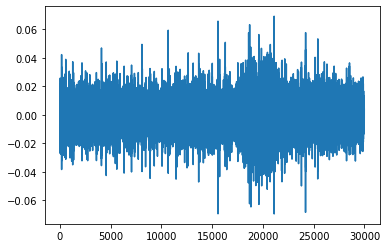

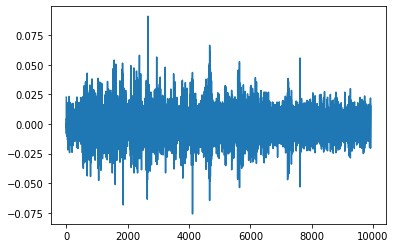

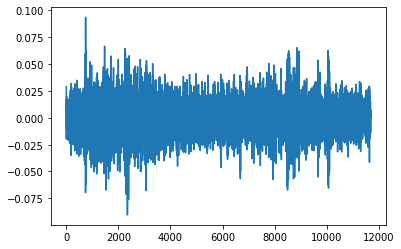

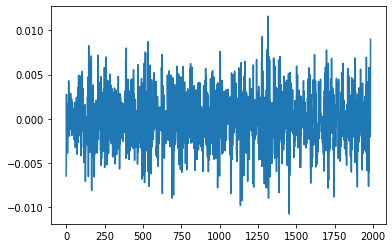

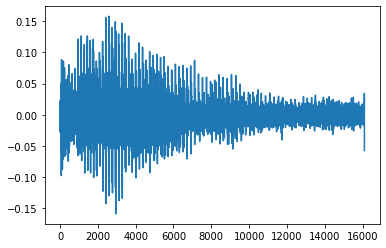

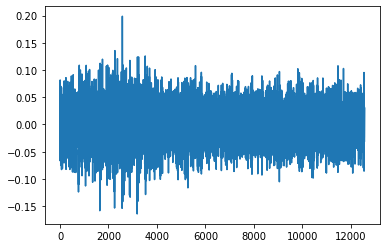

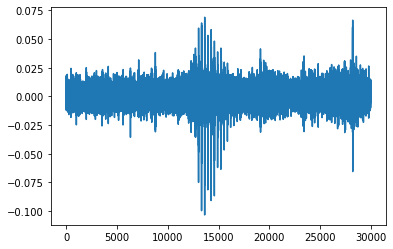

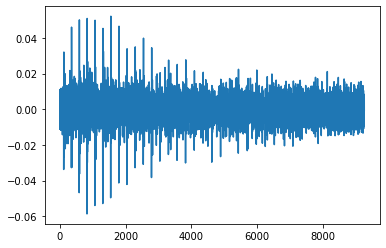

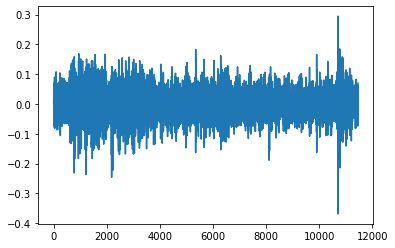

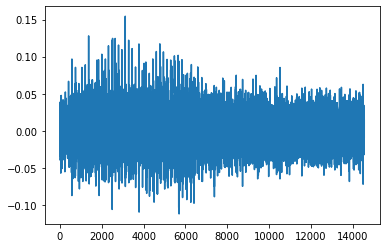

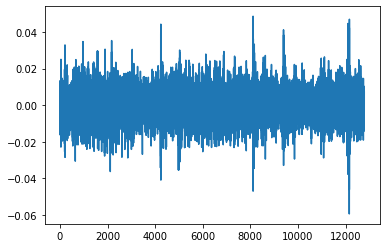

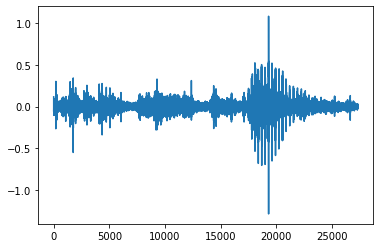

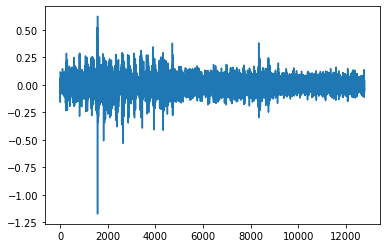

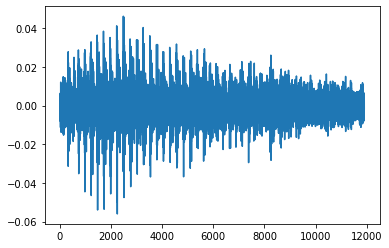

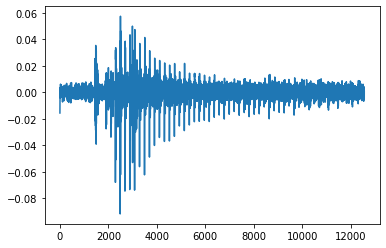

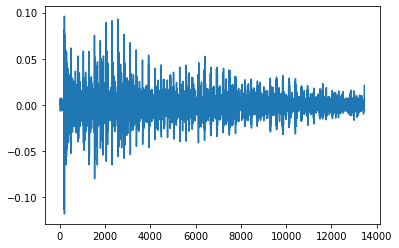

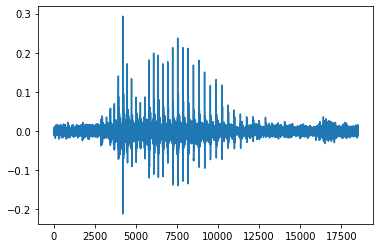

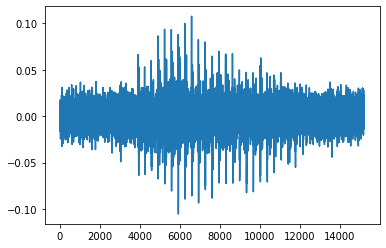

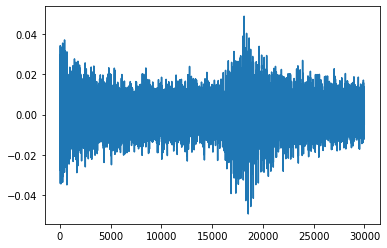

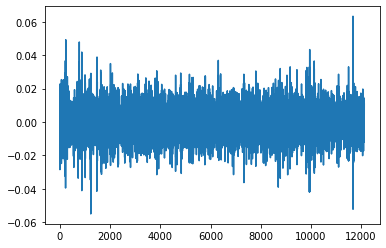

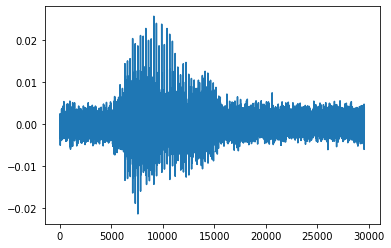

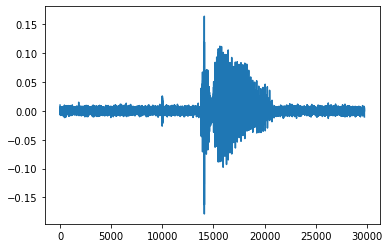

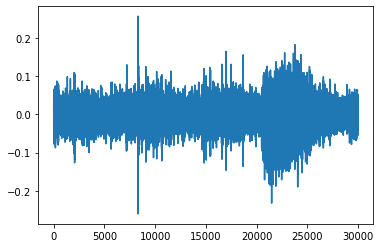

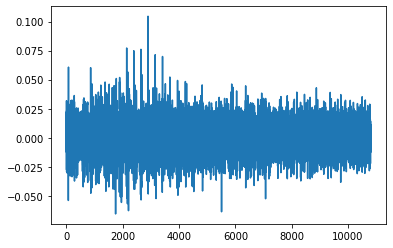

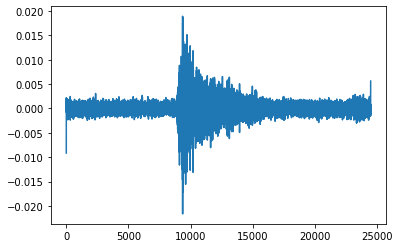

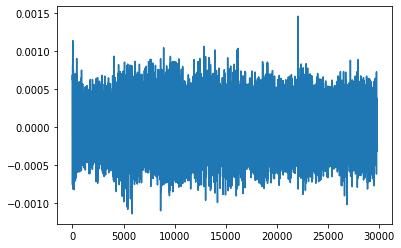

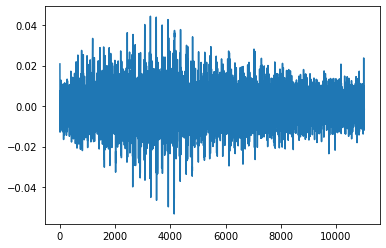

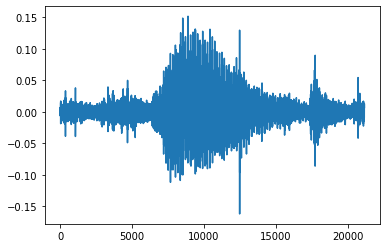

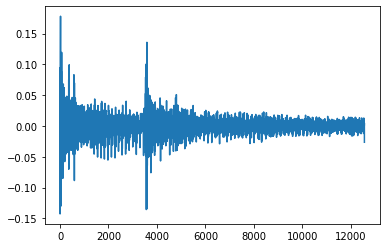

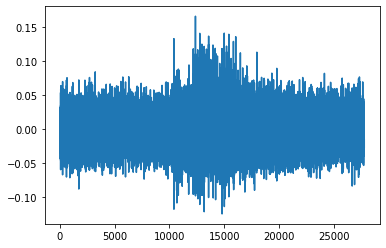

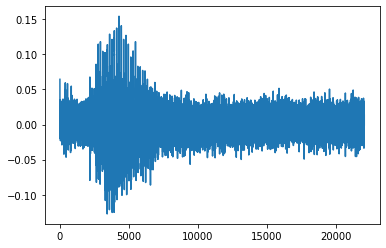

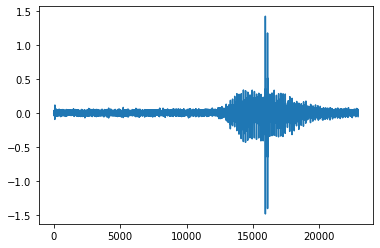

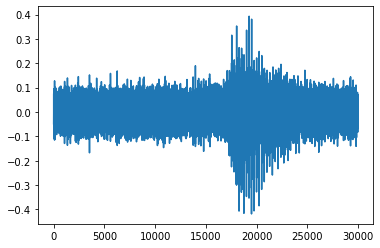

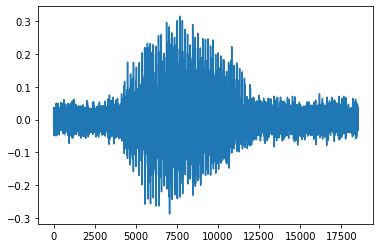

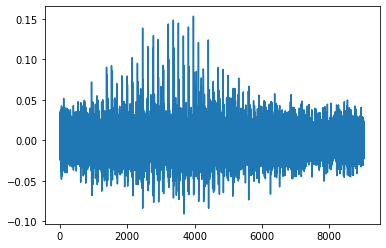

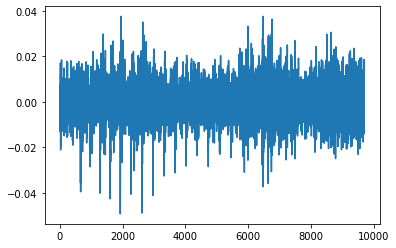

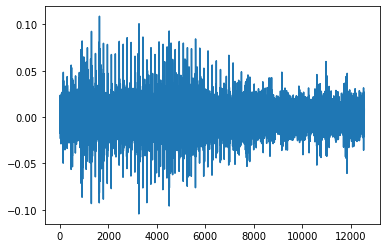

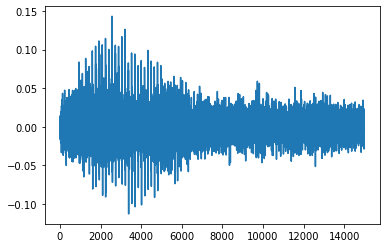

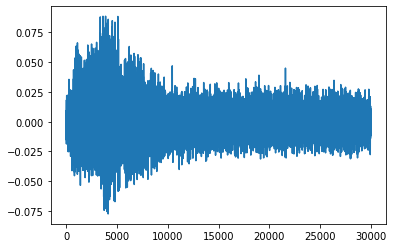

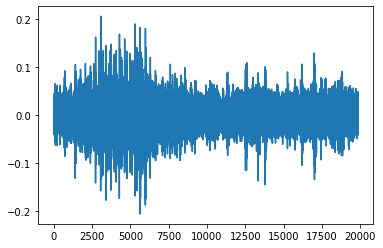

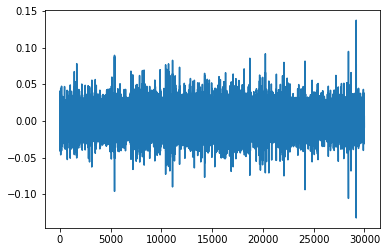

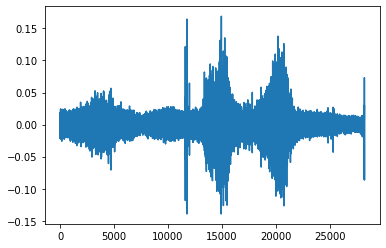

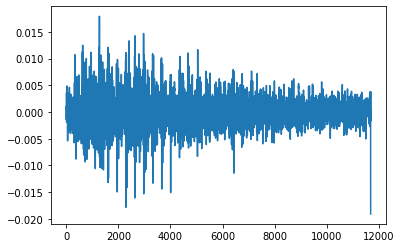

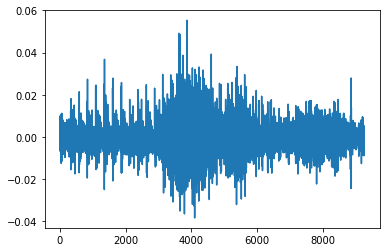

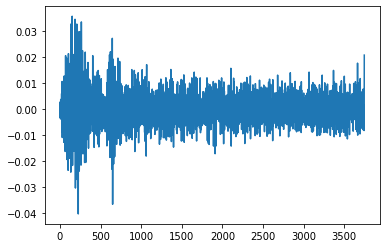

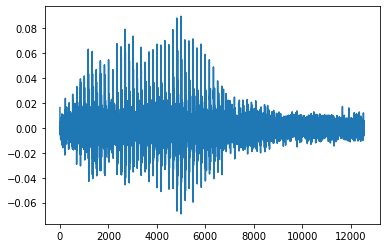

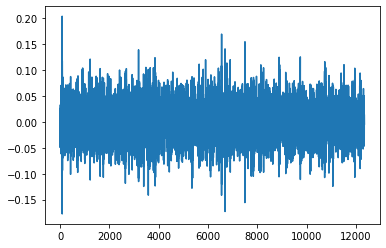

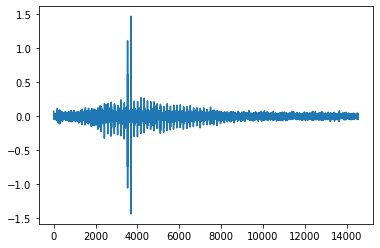

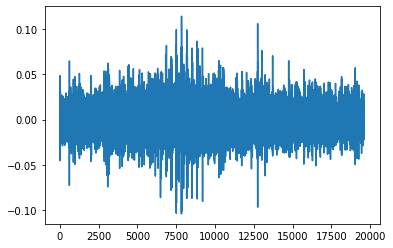

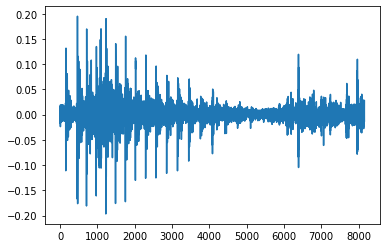

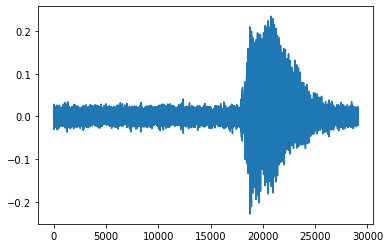

In [ ]:
i = 0
for word in os.listdir('Commands_Dataset/train_noisy'): 
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        # print(word, sample)

        filepath = 'Commands_Dataset/train_noisy/'+ word + '/' + sample

        sig,sr = librosa.load(filepath)

        #endp = end_point(sig)

        endp = pre_emp(filepath)

        print(len(endp))
        plt.figure()
        plt.plot(endp)

        i = i + 1

        if i > 50 :
            break
    if i > 50 :
        break

        # ### to ignoise only empyty / noise files
        # if np.int(len(endp)) >10000 :
        #     sf.write('Commands_Dataset/train_end_pointed/'+ word + '/' + sample, end
                     

Text(0, 0.5, 'magnitude of Fourier Transform')

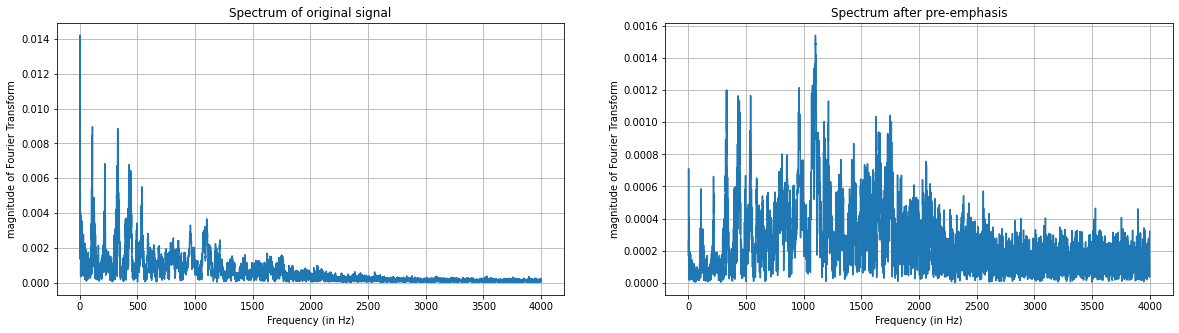

In [ ]:
# computing Fourier transform

from scipy.fft import fft, fftfreq
# Number of sample points
N = len(sig)
# sample spacing
T = 1.0 / 16000.0
yf = fft(sig)
xf = fftfreq(N, T)[:N//4]

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(  xf  , 2.0/N * np.abs(yf[0:N//4])  )
plt.grid()
plt.title("Spectrum of original signal")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("magnitude of Fourier Transform")

signal = endp
yf = fft(signal)
xf = fftfreq(N, T)[:N//4]

plt.subplot(122)
plt.plot(  xf  , 2.0/N * np.abs(yf[0:N//4])  )
plt.grid()
plt.title("Spectrum after pre-emphasis")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("magnitude of Fourier Transform")

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

'down', 'yes', 'no', 'right', 'stop' off on left up ,     done

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['down' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['yes' , 'no' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['right' , 'stop' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
 ++ os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['off' , 'on' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['left' , 'up' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

In [ ]:
os.listdir('Commands_Dataset/train_noisy')

i = 0

#for word in os.listdir('Commands_Dataset/train_end_pointed'): 
for word in ['go' ]:    
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy/'+ word): 
        #print(word, sample)

        pre_emph= pre_emp('Commands_Dataset/train_noisy/'+ word + '/' + sample)

        sf.write('Commands_Dataset/train_noisy_pre_emp/'+ word + '/' + sample, pre_emph, 16000 )

        i = i + 1
        print(i)

    #     if i > 10 :
    #         break
    # if i > 10 :
    #         break

## **Function to extract MFCC features**

In [ ]:
# MFCC feature extraction

def mfcc(filepath):

    sig ,samp = librosa.load(filepath)
    #mfcc

    mfcc = librosa.feature.mfcc(y=sig, sr=samp, n_mfcc=13 ,S=None, dct_type=2, norm='ortho')
    ## difference of mfcc
    mfcc_delta = librosa.feature.delta(mfcc,order=1, mode = 'nearest')
    ## difference of difference
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2, mode = 'nearest')

    mfcc_features = np.concatenate((mfcc, mfcc_delta , mfcc_delta2 ), axis=0)
    
    return mfcc_features 

storing the training data

## **Training Data creation**

In [ ]:
i = 0

training_down = {}

classes = ['down', ] #'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training_down[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['down'] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_down[true_word]
        y.append(sample_mfcc)
        training_down[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_down.pkl", "wb") as file:
    pickle.dump(training_down , file)

In [ ]:
i = 0

training_go = {}

classes = ['go', ] #'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training_go[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['go'] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_go[true_word]
        y.append(sample_mfcc)
        training_go[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_go.pkl", "wb") as file:
    pickle.dump(training_go , file)

In [ ]:
i = 0

training_left = {}

classes = ['left', ] #'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training_left[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['left'] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_left[true_word]
        y.append(sample_mfcc)
        training_left[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_left.pkl", "wb") as file:
    pickle.dump(training_left , file)

In [ ]:
i = 0

training_no = {}

classes = ['no', ] #'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training_no[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['no'] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_no[true_word]
        y.append(sample_mfcc)
        training_no[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_no.pkl", "wb") as file:
    pickle.dump(training_no , file)

In [ ]:
i = 0

training_off = {}

classes = ['off', ] #'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    training_off[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['off'] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_off[true_word]
        y.append(sample_mfcc)
        training_off[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_off.pkl", "wb") as file:
    pickle.dump(training_off , file)

In [ ]:
i = 0

training_remaining = {}

classes = [ 'on', 'right' ]#'stop', 'up', 'yes']

for c in classes :
    training_remaining[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['on', 'right'  ] : #'stop', 'up', 'yes' ] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_remaining[true_word]
        y.append(sample_mfcc)
        training_remaining[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_remaining.pkl", "wb") as file:
    pickle.dump(training_remaining , file)

In [ ]:
i = 0

training_remaining = {}

classes = [ 'stop', 'up', 'yes']

for c in classes :
    training_remaining[c] = []

#for word in os.listdir('Commands_Dataset/train_pre_emp'):
for word in ['stop', 'up', 'yes' ] :
    print(word)
    for sample in os.listdir('Commands_Dataset/train_noisy_pre_emp/'+word):

        true_word = word

        p = 'Commands_Dataset/train_noisy_pre_emp/'+word + '/' + sample

        print(p)

        sample_mfcc = mfcc(p).T
        y = training_remaining[true_word]
        y.append(sample_mfcc)
        training_remaining[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break

with open("training_noisy_pre_emp_remaining_2.pkl", "wb") as file:
    pickle.dump(training_remaining, file)

In [ ]:
training = {}
classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

infile = open('training_noisy_pre_emp_down.pkl','rb')
a = pickle.load(infile)
infile.close()
training['down'] = a['down']

infile = open('training_noisy_pre_emp_go.pkl','rb')
a = pickle.load(infile)
infile.close()
training['go'] = a['go']

infile = open('training_noisy_pre_emp_left.pkl','rb')
a = pickle.load(infile)
infile.close()
training['left'] = a['left']

infile = open('training_noisy_pre_emp_no.pkl','rb')
a = pickle.load(infile)
infile.close()
training['no'] = a['no']

infile = open('training_noisy_pre_emp_off.pkl','rb')
a = pickle.load(infile)
infile.close()
training['off'] = a['off']


infile = open('training_noisy_pre_emp_remaining.pkl','rb')
a = pickle.load(infile)
infile.close()
training['on'] = a['on']
training['right'] = a['right']

infile = open('training_noisy_pre_emp_remaining_2.pkl','rb')
a = pickle.load(infile)
infile.close()
training['stop'] = a['stop']
training['up'] = a['up']
training['yes'] = a['yes']

In [ ]:
training.keys()

dict_keys(['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes'])

In [ ]:
# saving the training data

with open("training_noisy_pre_emp.pkl", "wb") as file:
    pickle.dump(training , file)

In [ ]:
infile = open('training_noisy_pre_emp.pkl','rb')
training = pickle.load(infile)
infile.close()

## **Test Data creation**

In [ ]:
def energy_hamming(signal):
    h = np.hamming(160)
    energy = np.matmul(signal*h,signal*h)
    return energy


def end_point_file(filename):

    #signal , sr = librosa.load(filename)

    signal, sr = sf.read(filename)

    n = len(signal)
    slices = []
    for i in range(1,n//160):
        slices.append(signal[(i-1)*160 : i * 160 ])
    
    num = len(slices)
    #print(len(slices))

    start = 0
    end = num-1

    for i in range(num):
        if energy_hamming(slices[i]) > 0.004 :
            start = i
            break 
    
    for i in range(num-1,0,-1):
        if energy_hamming(slices[i]) > 0.004 :
            end = i+1
            break

    a = np.array(slices[start:end])
    a = a.flatten()

    return a

def pre_emp_signal(sig, pre_emphasis_factor = 0.95):

    n = len(sig)

    output = [0]*n

    output[0] = sig[0]

    for i in range(1,n):

        output[i] = sig[i] - pre_emphasis_factor * sig[i-1]
        
    return output

# MFCC feature extraction

def mfcc_signal(sig):

    #mfcc

    mfcc = librosa.feature.mfcc(y=sig, sr=16000, n_mfcc=13 ,S=None, dct_type=2, norm='ortho')
    ## difference of mfcc
    mfcc_delta = librosa.feature.delta(mfcc,order=1, mode = 'nearest')
    ## difference of difference
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2, mode = 'nearest')

    mfcc_features = np.concatenate((mfcc, mfcc_delta , mfcc_delta2 ), axis=0)
    
    return mfcc_features 

In [ ]:

i = 0
testing_noisy = {}

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

for c in classes :
    testing_noisy[c] = []

for word in os.listdir('Commands_Dataset/test_noisy'):
    for sample in os.listdir('Commands_Dataset/test_noisy/'+word):
        true_word = word
        p = 'Commands_Dataset/test_noisy/'+word + '/' + sample

        enp  = end_point_file(p)

        pre_empha = pre_emp_signal(enp)  
        pre_empha = np.array(pre_empha)

        print(p)

        sample_mfcc = mfcc_signal(pre_empha).T
        y = testing_noisy[true_word]
        y.append(sample_mfcc)
        testing_noisy[true_word] = y

        i = i + 1
        print(i)

    #     if i > 50 :
    #         break
    # if i > 50 :
    #         break


print('testing data created')

#Saving the testing data

with open("testing_noisy.pkl", "wb") as file:
    pickle.dump(testing_noisy , file)


In [ ]:
infile = open('testing_clean.pkl','rb')
testing = pickle.load(infile)
infile.close()

# **Training**

In [ ]:

training_data_file  =  open('training_noisy_pre_emp.pkl', 'rb')
training = pickle.load(training_data_file)
training_data_file.close()


trained_model = {}
hmm_states = 8

for true_word in training.keys():

    model = hmm.GaussianHMM(n_components = hmm_states, covariance_type='full', n_iter= 10 , )
    print(true_word)

    ## collecting the features of each word to train 
    data = training[true_word]

    n = len(data)

    u = np.zeros([n,] , dtype=np.int)
    
    # for j in range(n):
    #     u[j] =  data[j].shape[0]

    q = 0
    while q < np.int(len(data)):
        u[q] = data[q].shape[0]
        q =q+1
    
    data = np.vstack(data)

    # n = len(data)
    # n1 = len(data)
    # data = np.array(data)
    # data = data.reshape(n,n1)

    model.fit(data, lengths=u)
    
    trained_model[true_word] = model


# saving model as pkl file

with open("trained_noisy.pkl", "wb") as file:
    pickle.dump(trained_model, file)

down
go
left
no
off
on
right
stop
up
yes


## **saving model**

In [ ]:
# saving trained model

with open("trained_noisy.pkl", "wb") as file:
    pickle.dump(trained_model, file)

## **Prediction**

In [ ]:

# making the input featurs and output labels of test data  

test_data  =  open('testing_noisy.pkl', 'rb')
test = pickle.load(test_data)
test_data.close()


x_testA = []
y_testA = []

for a in test.keys():
    feature = test[a]

    l = len(feature)

    for t  in range(l):
        y_testA.append(a)
        x_testA.append(feature[t])


# function to do prediction

def prediction(test_data, trained):
    predicted_label = []
    words = []
    score_values = []

    for k in trained.keys():
        score_values.append(trained[k].score(test_data))
        words.append(k)

    predicted_label.append(score_values.index(max(score_values)))

    return words[predicted_label[0]]



In [ ]:
# predicting the output for testing data

trained_model  =  open('trained_noisy.pkl', 'rb')
trained_model_hmm = pickle.load(trained_model)
trained_model.close()

n = len(x_testA)
pred_test = []
pred_train = []
tot_test = 0

for i in range(n):
  y_pred = prediction(x_testA[i],trained_model_hmm )

  if y_pred == y_testA[i]:
      tot_test += 1

  pred_test.append(y_pred)

above training part took 1 minutes for 10 iteration

## **Confusion Matrix Plot**

<class 'numpy.ndarray'>
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']
[  0  35 157   0   0   2   0   6 102   0]
Accuracy =  11.76470588235294 %


<Figure size 1080x1080 with 0 Axes>

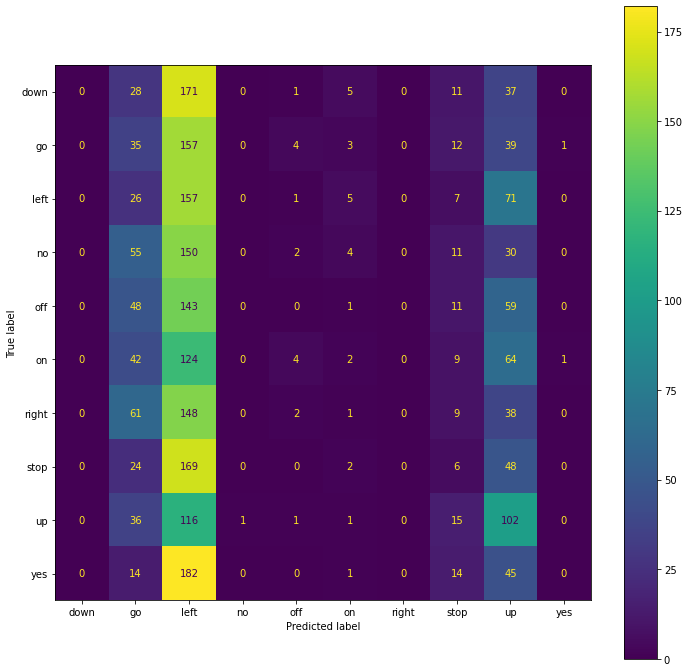

In [ ]:

cm = confusion_matrix(y_testA, pred_test)

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(12,12))
#cmp.plot(ax=ax)

disp.plot(ax=ax)
plt.show()

# classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

# **Prediction on training data**

In [ ]:

# making the input featurs and output labels of test data  

test_data  =  open('training_noisy_pre_emp.pkl', 'rb')
test = pickle.load(test_data)
test_data.close()


x_testA = []
y_testA = []

for a in test.keys():
    feature = test[a]

    l = len(feature)

    for t  in range(l):
        y_testA.append(a)
        x_testA.append(feature[t])


# function to do prediction

def prediction(test_data, trained):
    predicted_label = []
    words = []
    score_values = []

    for k in trained.keys():
        score_values.append(trained[k].score(test_data))
        words.append(k)

    predicted_label.append(score_values.index(max(score_values)))

    return words[predicted_label[0]]



In [ ]:
# predicting the output for testing data

#trained_model  =  open('trained_clean.pkl', 'rb')
trained_model  =  open('trained_noisy.pkl', 'rb')
trained_model_hmm = pickle.load(trained_model)
trained_model.close()

n = len(x_testA)
pred_test = []
pred_train = []
tot_test = 0

for i in range(n):
  y_pred = prediction(x_testA[i],trained_model_hmm )

  if y_pred == y_testA[i]:
      tot_test += 1

  pred_test.append(y_pred)

above training part took 1 minutes for 10 iteration

## **Confusion Matrix Plot**

<class 'numpy.ndarray'>
['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']
[1664 1484 1573 1711 1479 1831 2052 1964  654 1832]
Accuracy =  68.59217971455114 %


<Figure size 1080x1080 with 0 Axes>

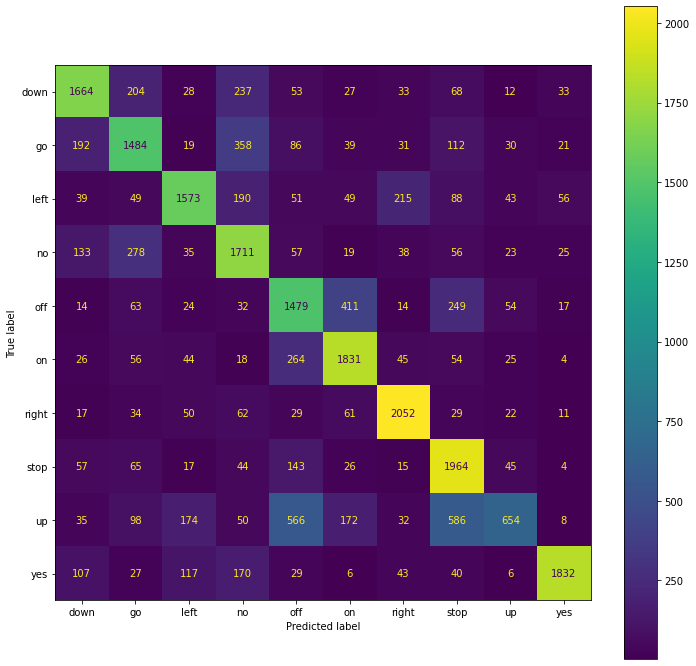

In [ ]:

cm = confusion_matrix(y_testA, pred_test)

classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(12,12))
#cmp.plot(ax=ax)

disp.plot(ax=ax)
plt.show()

# classes = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']



# **Discussions**

Evaluation metrics – Accuracy (Percentage of words in the test set that are recognized correctly). Obtain the
confusion matrix and consider how you can improve accuracy based on this. 

# **How to improve accuracy**



*   most of the test data was predicted as 'go' , 'up' , 'stop' , and 'right'.

*   we need to collect more training data for the other classes.

  
*  From the confusion matrix, We can notice the confusion between “GO” & “NO”. This might be because both these both are very similar-sounding small utterances with one vowel sound in common. Also in in both word utterances speakers usually emphasize( more duration) more on the vowel “o” at end. Hhence, there is a lot  more confusion between these two words.

# **References**

*    https://hmmlearn.readthedocs.io/en/latest/tutorial.html

*    
